## Micro-theory

- OHLCV: Open, High, Low, Close, Volume. Use adjusted prices to include splits/dividends for total-return realism

- Percent vs. log returns
    - Simple (percent) return: r_t = P_t / (P_(t-1)) - 1

    - Log return: l_t = ln(1 + r_t) = ln(P_t) - ln(P_(t-1))

    (Log returns add nicely over time, percent returns dont)

In [246]:
import numpy as np, pandas as pd, yfinance as yf
import matplotlib.pyplot as plt

In [247]:
df = yf.download('SPY', start = '2015-01-01', auto_adjust = True)
df = df.rename(columns=str.lower)

[*********************100%***********************]  1 of 1 completed


In [248]:
assert df.index.is_monotonic_increasing
assert df[['open', 'high', 'low', 'close']].notna().all().all()

In [249]:
df['ret'] = df['close'].pct_change()
df['log_ret'] = np.log1p(df['ret'])

In [250]:
df = df.loc[df.index[1:]]

In [251]:
df

Price,close,high,low,open,volume,ret,log_ret
Ticker,spy,spy,spy,spy,spy,,
Date,,,,,,,
2015-01-05,168.469574,170.682757,168.160567,170.515727,169632600,-0.018060,-0.018225
2015-01-06,166.882736,169.304710,166.080972,168.778552,209151400,-0.009419,-0.009464
2015-01-07,168.962280,169.304701,167.768000,168.218984,125346700,0.012461,0.012384
2015-01-08,171.960541,172.177692,170.365385,170.382079,147217800,0.017745,0.017590
2015-01-09,170.582520,172.394827,169.964493,172.378120,158567300,-0.008014,-0.008046
...,...,...,...,...,...,...,...
2025-08-25,642.469971,645.289978,642.349976,644.039978,51274300,-0.004401,-0.004411
2025-08-26,645.159973,645.510010,641.570007,642.200012,51581600,0.004187,0.004178


In [252]:
df[['close', 'ret', 'log_ret']].tail(3)

Price,close,ret,log_ret
Ticker,spy,,
Date,,,
2025-08-27,646.630005,0.002279,0.002276
2025-08-28,648.919983,0.003541,0.003535
2025-08-29,645.049988,-0.005964,-0.005982


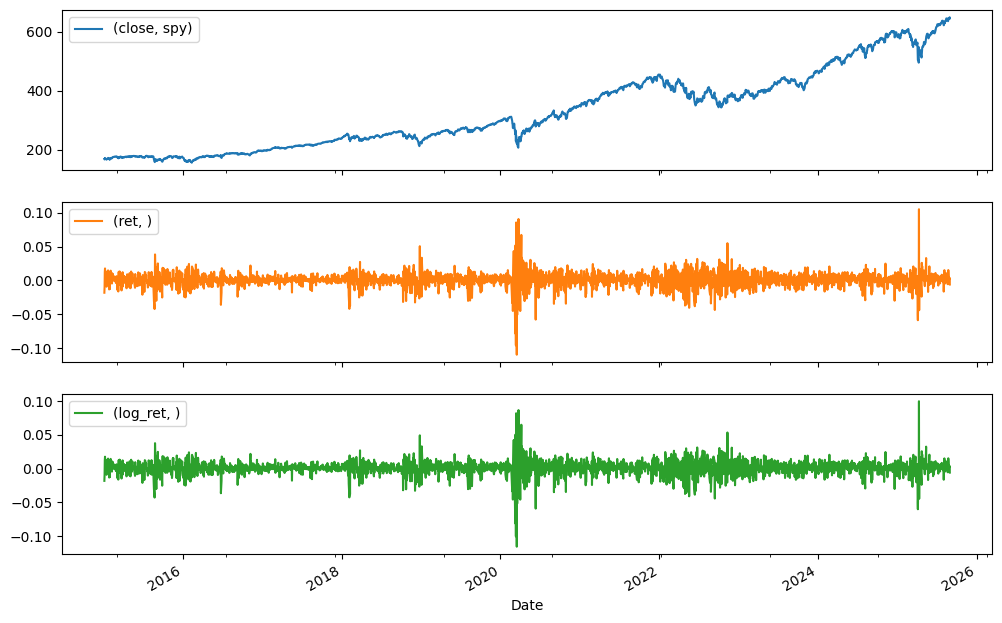

In [253]:
df.plot(y = ['close', 'ret', 'log_ret'], subplots = True, figsize = (12, 8))
plt.show()


In [254]:
## average daily returns

df['log_ret'].mean()
df['log_ret'].std()

## average annual returns

df['log_ret'].mean() * 252

print("percentages")

print("avg daily log return: ", df['log_ret'].mean() * 100)

print("std daily log return: ", df['log_ret'].std() * 100)

print("avg annual log return: ", df['log_ret'].mean() * 252 * 100)

print("std annual log return: ", df['log_ret'].std() * np.sqrt(252) * 100)

## cumulative log returns


percentages
avg daily log return:  0.049415963017315996
std daily log return:  1.1336685843726995
avg annual log return:  12.45282268036363
std annual log return:  17.99643086050085


In [255]:
df['cum_log_ret'] = df['log_ret'].cumsum()

## daily returns


<Axes: xlabel='Date'>

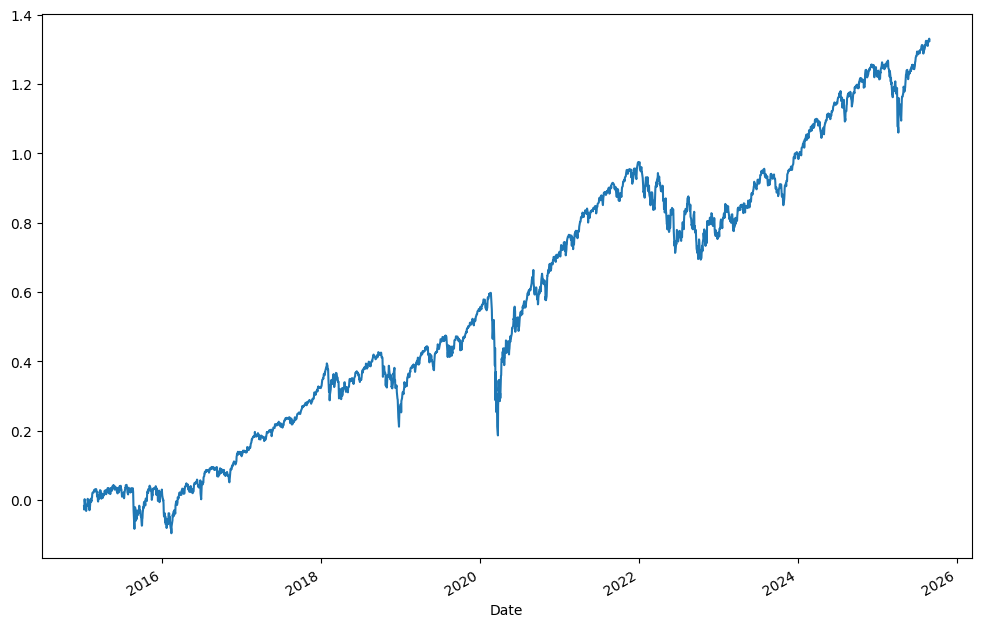

In [256]:
df['cum_log_ret'].plot(figsize = (12, 8))

In [257]:
df['cum_growth'] = np.exp(df['cum_log_ret'])

<Axes: xlabel='Date'>

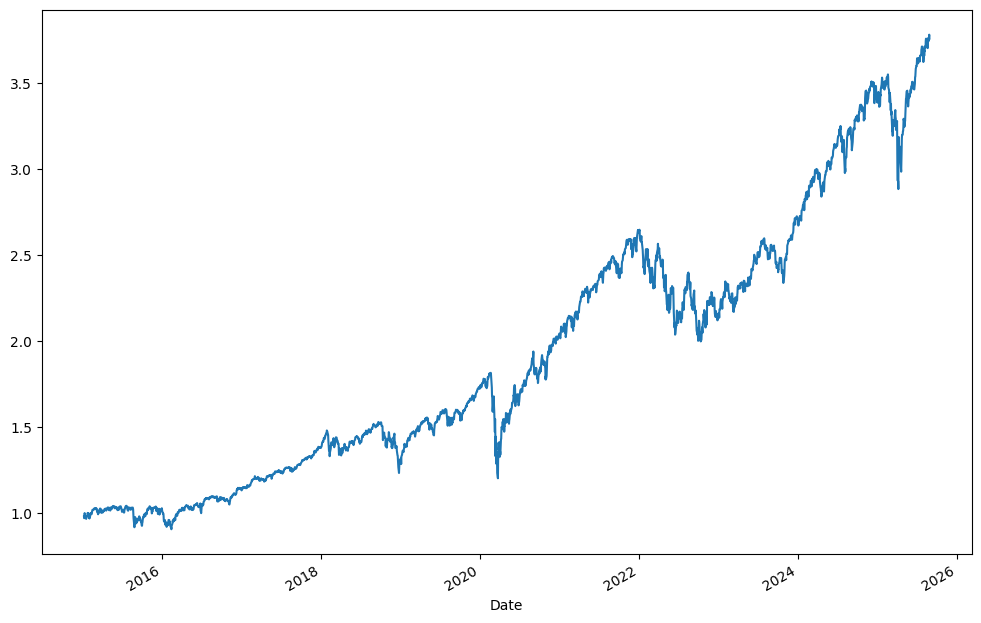

In [258]:
df['cum_growth'].plot(figsize = (12, 8))

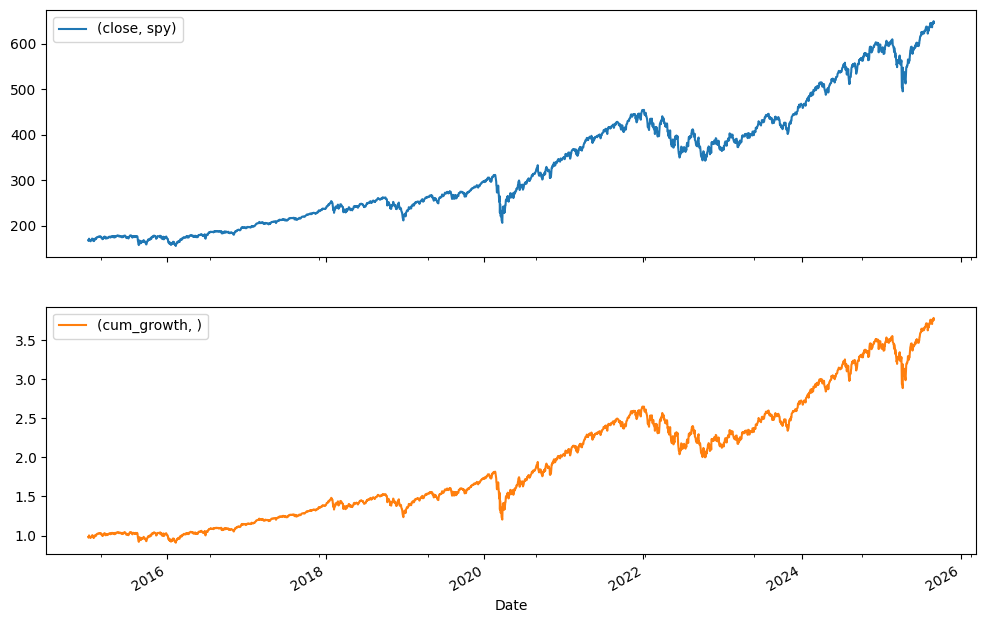

In [259]:
df[['close', 'cum_growth']].plot(subplots = True, figsize = (12, 8))
plt.show()

In [260]:
df['cum_growth_scaled'] = df['cum_growth'] * df['close'].iloc[0].to_numpy().item()

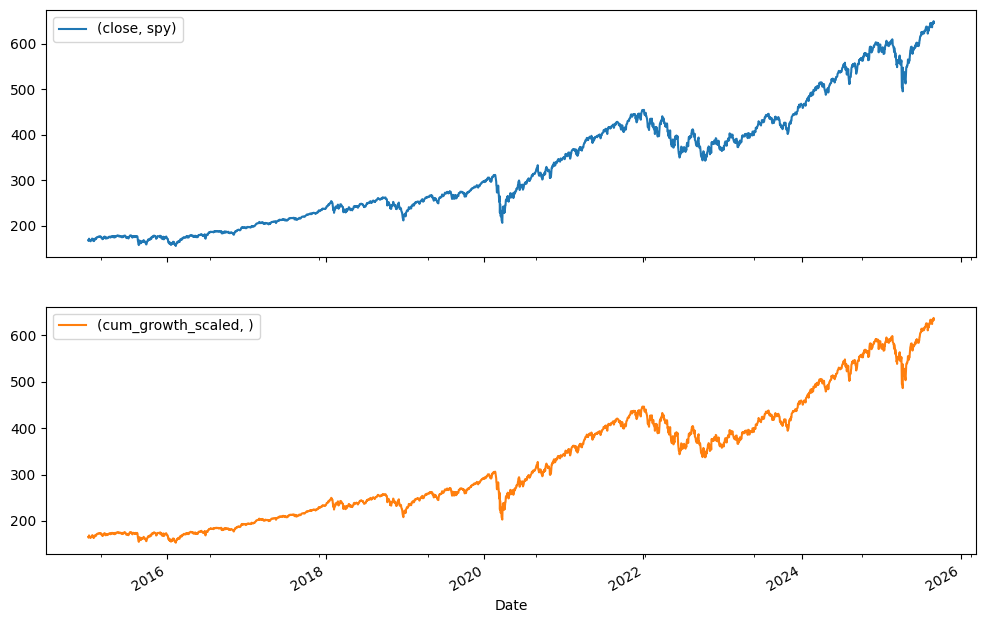

In [261]:
df[['close', 'cum_growth_scaled']].plot(subplots = True, figsize = (12, 8))
plt.show()

### Calculating Compounding Annual Growth Rate (CAGR)
#### Using returns

In [262]:
P_T = df['close'].iloc[-1]
P_not =  df['close'].iloc[0]
cagr_price = ( (P_T / df['close'].iloc[0]) ** (252/len(df['close'].to_numpy())) ) - 1
print("CAGR using prices: ", cagr_price.item())

CAGR using prices:  0.13455659108620432


### Calculating Compounding Annual Growth Rate (CAGR)
#### Using log returns

In [263]:
l_bar = df['log_ret'].mean()
cagr_log = np.exp(252 * l_bar) - 1
print("CAGR using log returns: ", cagr_log.item())

CAGR using log returns:  0.1326139900817367


### Arithmetic Annualized Returns

- simple average of periodic investment returns that does not account for compounding or volatility

In [264]:
arit_annualized_ret = 252 * df['ret'].mean()
print("Arithmetic Annualized Returns: ", arit_annualized_ret.item())

Arithmetic Annualized Returns:  0.14072224426455052


### Continuous Annualized Rate

- an interest or return rate that assumes compounding occurs an infinite number of times within a year, resulting in the maximum possible return for a given rate.

In [265]:
continuous_annual_rate = 252 * df['log_ret'].mean()
print("Continuous Annualized Rate: ", continuous_annual_rate.item())

Continuous Annualized Rate:  0.1245282268036363


### Volatility Drag

- Volatility drag, or "variance drain," is the phenomenon where an investment's compound growth rate is lower than its simple average return, leading to less wealth accumulation over time. This occurs because, mathematically, recovering from a percentage loss requires a greater percentage gain to break even. 

In [266]:
vol_drag_approx = 1/2 * 252 * df['ret'].var()
vol_drag = arit_annualized_ret - continuous_annual_rate
print('approximate volatility drag: ', vol_drag_approx.item(), '\nactual volatility drag: ', vol_drag.item())

approximate volatility drag:  0.016124041523813727 
actual volatility drag:  0.016194017460914215


### Approximation to the Continuous Annualized Rate

In [267]:
avg_log_approx = (df['ret'].mean() - 0.5 * df['ret'].var()) * 252
print("Approximation to the Continuous Annualized Rate: ", avg_log_approx.item())
print("difference between approximation and actual: ", (continuous_annual_rate - avg_log_approx).item())

Approximation to the Continuous Annualized Rate:  0.12459820274073681
difference between approximation and actual:  -6.99759371005082e-05


### Sharpe Ration

- return per unit of “typical wiggle”

In [268]:
r_safe = 0.045 / 252
T = len(df['close'].to_numpy())
avg_excess_ret = (df['ret'] - r_safe).mean()
print("average excess returns: ", avg_excess_ret)
wiggle = (df['ret'] - r_safe).std()
print("wiggle: ", wiggle)
sharpe = avg_excess_ret / wiggle
print("daily sharpe: ", sharpe)
annual_sharpe = (np.sqrt(252) * sharpe).item()
print("annual sharpe: ", annual_sharpe)

average excess returns:  0.000379850175652978
wiggle:  0.011312319988505062
daily sharpe:  0.03357845040088684
annual sharpe:  0.5330413750299822


### Max Drawdown

- measures the largest peak-to-trough decline in the value of an investment over a specified period, expressed as a percentage. It indicates the maximum potential loss an investor could experience from a high point before reaching a new peak, helping to assess an investment's risk and downside volatility.

- A lower MDD signifies better capital preservation during periods of market decline.

In [269]:
# why does volatility assume return are "nice" (bell curves)

df['cum_max'] = df['cum_growth'].cummax()

drawdowns = (df['cum_growth'] - df['cum_max']) / df['cum_max']

max_drawdown = min(drawdowns)
date = list(drawdowns.to_numpy()).index(max_drawdown)


print("Max Drawdown of SPY: ", max_drawdown, "\nDate: ", df.iloc[date].name)

Max Drawdown of SPY:  -0.3371726367252089 
Date:  2020-03-23 00:00:00


Volatility → if you can handle the daily swings.

Drawdown → if you can survive the worst storm without quitting.

### Moving Averages

In [270]:
copy_df = df.copy()

In [271]:

copy_df['sma'] = df['close'].rolling(window=20).mean()


copy_df['lma'] = df['close'].rolling(window=100).mean()



In [272]:
copy_df

Price,close,high,low,open,volume,ret,log_ret,cum_log_ret,cum_growth,cum_growth_scaled,cum_max,sma,lma
Ticker,spy,spy,spy,spy,spy,,,,,,,,
Date,,,,,,,,,,,,,
2015-01-05,168.469574,170.682757,168.160567,170.515727,169632600,-0.018060,-0.018225,-0.018225,0.981940,165.427052,0.981940,NaN,NaN
2015-01-06,166.882736,169.304710,166.080972,168.778552,209151400,-0.009419,-0.009464,-0.027689,0.972691,163.868872,0.981940,NaN,NaN
2015-01-07,168.962280,169.304701,167.768000,168.218984,125346700,0.012461,0.012384,-0.015305,0.984812,165.910860,0.984812,NaN,NaN
2015-01-08,171.960541,172.177692,170.365385,170.382079,147217800,0.017745,0.017590,0.002285,1.002288,168.854972,1.002288,NaN,NaN
2015-01-09,170.582520,172.394827,169.964493,172.378120,158567300,-0.008014,-0.008046,-0.005761,0.994256,167.501838,1.002288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-25,642.469971,645.289978,642.349976,644.039978,51274300,-0.004401,-0.004411,1.320340,3.744695,630.867108,3.761248,637.065497,594.366234
2025-08-26,645.159973,645.510010,641.570007,642.200012,51581600,0.004187,0.004178,1.324518,3.760374,633.508530,3.761248,637.560495,595.189272


In [273]:
copy_df['strat_pos'] = (copy_df['sma'] > copy_df['lma']).astype(int)
copy_df['strat_pos'] = copy_df['strat_pos'].shift(1)
copy_df['strat_ret'] = copy_df['ret'] * copy_df['strat_pos']

In [274]:
copy_df['strat_log_ret'] = np.log1p(copy_df['strat_ret'])

In [277]:
CAGR_strat = np.exp(252* copy_df['strat_log_ret'].mean()) - 1
print("CAGR of MA: ", CAGR_strat)
daily_sharpe_strat = copy_df['strat_log_ret'].mean() / copy_df['strat_log_ret'].std()
annual_sharpe_strat = (np.sqrt(252) * daily_sharpe_strat).item()
print("Wiggle of MA: ", copy_df['strat_log_ret'].std())
print("Daily Sharpe of MA: ", daily_sharpe_strat, "\nAnnual Sharpe of MA: ", annual_sharpe_strat)
copy_df['strat_cum_log_ret'] = copy_df['strat_log_ret'].cumsum()
copy_df['strat_cum_growth'] = np.exp(copy_df['strat_cum_log_ret'])
copy_df['strat_cum_max'] = copy_df['strat_cum_growth'].cummax()

drawdowns = (copy_df['strat_cum_growth'] - copy_df['strat_cum_max']) / copy_df['strat_cum_max']
drawdowns = drawdowns.dropna()
max_drawdown = min(drawdowns)
date = list(drawdowns.to_numpy()).index(max_drawdown)


print("Max Drawdown of MA Start: ", max_drawdown, "\nDate of MDD: ", copy_df.iloc[date].name)


CAGR of MA:  0.07575950789343788
Wiggle of MA:  0.0077403825126254175
Daily Sharpe of MA:  0.03743864190016076 
Annual Sharpe of MA:  0.5943200153509683
Max Drawdown of MA Start:  -0.21915325428414703 
Date of MDD:  2020-06-10 00:00:00
